<a href="https://colab.research.google.com/github/Nils1511/EE769/blob/main/EE769_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Read Data

In [ ]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import re
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")

In [ ]:
Mouse_train = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
Mouse_train.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


## 2. Exploratory Data Analysis

2.1 Which variables are usable, and which are not?

In [ ]:
Mouse_train.describe().T

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,762.0,0.437715,0.275175,0.170634,0.294759,0.371534,0.486749,2.516367
ITSN1_N,762.0,0.629456,0.274954,0.264085,0.481011,0.569058,0.700621,2.602662
BDNF_N,762.0,0.319844,0.046536,0.194160,0.290199,0.317696,0.346747,0.497160
NR1_N,762.0,2.311905,0.342923,1.414914,2.069609,2.309711,2.534053,3.757641
NR2A_N,762.0,3.882665,0.929202,1.794716,3.186726,3.800418,4.471656,8.482553
...,...,...,...,...,...,...,...,...
SYP_N,762.0,0.450260,0.062304,0.258626,0.407385,0.450500,0.488438,0.759588
H3AcK18_N,612.0,0.166017,0.059256,0.079691,0.124382,0.153342,0.195401,0.479763
EGR1_N,582.0,0.182322,0.041938,0.105537,0.152365,0.174184,0.205146,0.360692
H3MeK4_N,582.0,0.206105,0.058118,0.101787,0.164155,0.191754,0.235925,0.413903


In [ ]:
# differentiating independent and dependent variables
X = Mouse_train.iloc[:,:-2]
y_binary = Mouse_train.iloc[:,-2]
y_multi = Mouse_train.iloc[:,-1]

In [ ]:
y_binary

0      Control
1      Control
2      Control
3      Control
4      Control
        ...   
757     Ts65Dn
758     Ts65Dn
759     Ts65Dn
760     Ts65Dn
761     Ts65Dn
Name: Genotype, Length: 762, dtype: object

2.2 Correlation

<AxesSubplot:>

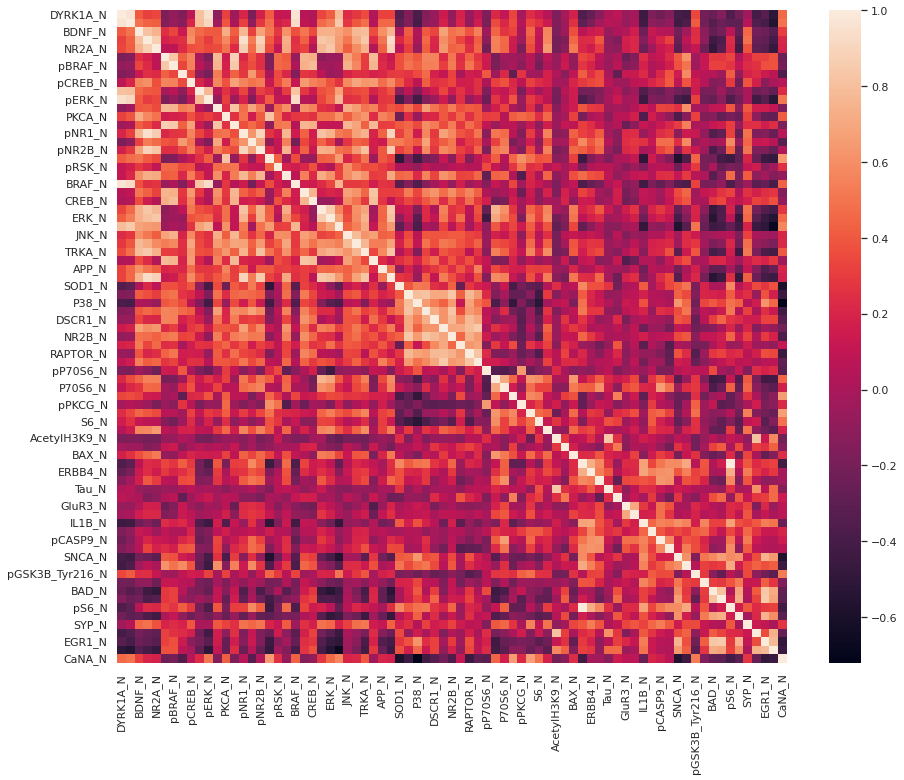

In [ ]:
plt.figure(figsize=(15, 12)) 
sns.heatmap(Mouse_train.corr(), annot = False)

In [ ]:
corr = Mouse_train.corr()           # https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e
corr 

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.223812,-0.250262,-0.150564,-0.358480,-0.224427,-0.035929,-0.406055,-0.324198,-0.518361,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.220720,-0.331306,-0.247760,-0.299066,-0.300170,0.039384,-0.354554,-0.403525,-0.558266,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,-0.112984,-0.279752,-0.210969,0.070504,-0.265185,0.454025,-0.207555,-0.247121,-0.331191,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,-0.100915,-0.434723,-0.369966,0.227674,-0.364487,0.486483,-0.253118,-0.287997,-0.404977,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.237932,-0.486259,-0.321165,0.215495,-0.426562,0.377628,-0.292016,-0.326056,-0.468892,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.115625,0.044640,0.020941,0.392329,-0.010451,1.000000,0.131303,0.093264,0.001912,0.273142
H3AcK18_N,-0.406055,-0.354554,-0.207555,-0.253118,-0.292016,0.317508,0.256479,0.229161,0.176392,-0.234061,...,0.121694,0.406723,0.323245,0.224768,0.216137,0.131303,1.000000,0.355167,0.744541,-0.263963
EGR1_N,-0.324198,-0.403525,-0.247121,-0.287997,-0.326056,0.313131,0.366838,0.137520,-0.124001,-0.199574,...,0.417847,0.831734,0.847950,0.291173,0.744911,0.093264,0.355167,1.000000,0.774110,-0.487640
H3MeK4_N,-0.518361,-0.558266,-0.331191,-0.404977,-0.468892,0.372945,0.378236,0.080201,-0.004925,-0.277739,...,0.268944,0.717214,0.688121,0.307902,0.594812,0.001912,0.744541,0.774110,1.000000,-0.452618


In [ ]:
def filter(any):
    if(any==1):
        return None
    elif(any>0.9):
        return any
    else:
        return None
new=corr.applymap(filter)
new

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,NaN,0.961321,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
ITSN1_N,0.961321,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
BDNF_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
NR1_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
NR2A_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
H3AcK18_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
EGR1_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
H3MeK4_N,NaN,NaN,None,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Here we create a upper triangular matrix from the correlation matrix
up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_)) 
to_drop = [column for column in up_tri.columns if any(up_tri[column] > 0.95)]    
print(to_drop)

['ITSN1_N', 'BRAF_N', 'pS6_N']


In [ ]:
# dropping highly correlated columns and create new list of desired columns
x_new = X.drop(to_drop,axis = 1)

<AxesSubplot:>

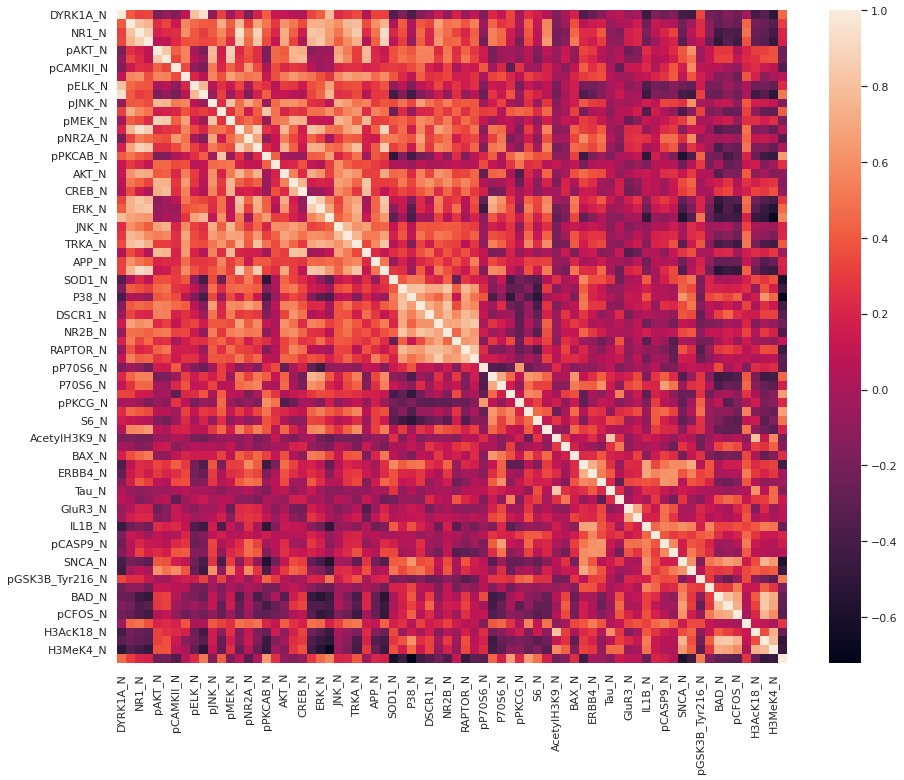

In [ ]:
plt.figure(figsize=(15, 12)) 
sns.heatmap(x_new.corr(), annot = False)

In [ ]:
np.array(x_new.isnull().sum())

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  15,   0,   0,   0,   4,
         0,   0,   0,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 180, 195,  60,   0, 150, 180, 180,   0])

2.3 Are the classes balanced ?

In [ ]:
Mouse_train["Genotype"].value_counts() # yes in binary we get almost equal distribution thus classes balanced

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

In [ ]:
Mouse_train["Treatment_Behavior"].value_counts()  # there is not a significant difference in disribution thus we can say that the classes balanced

Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64

## 3. Iterative Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Choose a style if you don't want the default ascending order
exStyle = 'descending'
# Imputer definition
exImputer = IterativeImputer(max_iter = 20, imputation_order=exStyle, random_state=42)
# Fit on the dataset
exImputer.fit(x_new)

# Transform and convert to a dataframe
exTrans = pd.DataFrame(exImputer.transform(x_new), columns = x_new.columns)
exTrans


,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,...,0.831557,0.188852,0.122652,0.108210,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,...,0.849270,0.200404,0.116682,0.109505,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,...,0.846709,0.193685,0.118508,0.108722,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,...,0.833277,0.192112,0.132781,0.118720,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,...,0.878668,0.205604,0.129954,0.118218,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.467915,...,1.001404,0.216128,0.156371,0.110916,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.476240,...,1.043402,0.209717,0.153224,0.110350,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.442727,...,0.948795,0.211279,0.166417,0.133664,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.432371,...,0.995884,0.197436,0.158631,0.136994,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [ ]:
np.array(exTrans.isnull().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## 4. Metrics of F1 score, balanced accuracy, AUC

4. Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, you have two separate classification tasks – one is binary, the other has four classes. You may have to do somereading about multi-class classification metrics. 

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

## 5. Five-fold Cross Validation

In [ ]:
X = exTrans.copy(deep = True)
df = Mouse_train.copy(deep = True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
y_binary = df['Genotype'].map({'Control': 0, 'Ts65Dn': 1}).values
y_multi = df['Treatment_Behavior'].map({'Memantine_C/S': 0, 'Memantine_S/C': 1, 'Saline_C/S': 2, 'Saline_S/C': 3}).values

# define the parameter grids to search over for each model type
param_grid_svm_linear = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_svm_rbf = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
param_grid_nn = {'hidden_layer_sizes': [(10,), (50,), (100,), (200,)], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
param_grid_rf = {'max_depth': [10, 20, 30, 40], 'max_features': [5, 10, 15, 20]}

# set up the cross-validation strategy (StratifiedKFold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc']
# set up the grid search for each model type

print("In Binary best hyperparamerters for linear SVM :")
for i in scoring:
    svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid_svm_linear, cv=cv, scoring=i)
    # fit the grid search models and print the best hyperparameters
    svm_linear.fit(X, y_binary)
    print( i + ':', svm_linear.best_params_)
print("In MultiClass best hyperparamerters for linear SVM :")
for i in scoring:
    svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid_svm_linear, cv=cv, scoring=i)
    svm_linear.fit(X, y_multi)
    print( i + ':', svm_linear.best_params_)

print("In Binary best hyperparamerters for RBF :")
for i in scoring:
    svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_svm_rbf, cv=cv, scoring=i)
    svm_rbf.fit(X, y_binary)
    print( i + ':', svm_rbf.best_params_)
print("In MultiClass best hyperparamerters for RBF :")
for i in scoring:
    svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_svm_rbf, cv=cv, scoring=i)
    svm_rbf.fit(X, y_multi)
    print(i + ':', svm_rbf.best_params_)

print("In Binary best hyperparamerters for neural networks :")
for i in scoring:
    nn = GridSearchCV(MLPClassifier(activation='relu', solver='adam'), param_grid_nn, cv=cv, scoring=i)
    nn.fit(X, y_binary)
    print( i + ':', nn.best_params_)
print("In MultiClass best hyperparamerters for neural networks :")
for i in scoring:
    nn = GridSearchCV(MLPClassifier(activation='relu', solver='adam'), param_grid_nn, cv=cv, scoring=i)
    nn.fit(X, y_multi)
    print( i + ':', nn.best_params_)

print("In Binary best hyperparamerters for Random Forest :")
for i in scoring:
    rf = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=42), param_grid_rf, cv=cv, scoring=i)
    rf.fit(X, y_binary)
    print(i + ':', rf.best_params_)
print("In Multiclass best hyperparamerters for Random Forest :")
for i in scoring:
    rf = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=42), param_grid_rf, cv=cv, scoring=i)
    rf.fit(X, y_multi)
    print( i + ':', rf.best_params_)


In Binary best hyperparamerters for linear SVM :
accuracy: {'C': 100}
f1: {'C': 100}
roc_auc: {'C': 100}
In MultiClass best hyperparamerters for linear SVM :
accuracy: {'C': 100}
f1: {'C': 0.01}
roc_auc: {'C': 0.01}
In Binary best hyperparamerters for RBF :
accuracy: {'C': 100, 'gamma': 0.1}
f1: {'C': 100, 'gamma': 0.1}
roc_auc: {'C': 10, 'gamma': 1}
In MultiClass best hyperparamerters for RBF :
accuracy: {'C': 100, 'gamma': 0.1}
f1: {'C': 0.01, 'gamma': 0.01}
roc_auc: {'C': 0.01, 'gamma': 0.01}
In Binary best hyperparamerters for neural networks :
accuracy: {'alpha': 0.001, 'hidden_layer_sizes': (200,)}
f1: {'alpha': 0.0001, 'hidden_layer_sizes': (200,)}
roc_auc: {'alpha': 0.0001, 'hidden_layer_sizes': (200,)}
In MultiClass best hyperparamerters for neural networks :
accuracy: {'alpha': 0.01, 'hidden_layer_sizes': (200,)}
f1: {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
roc_auc: {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
In Binary best hyperparamerters for Random Forest :
accura

## 6. Feature Importance

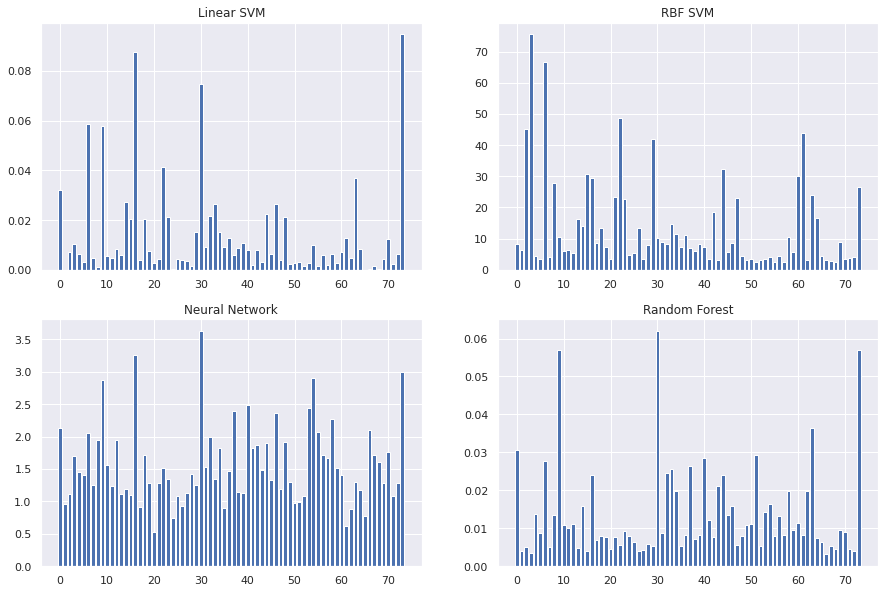

In [ ]:
# Linear SVM feature importance
from sklearn.svm import LinearSVC
# get best estimator from GridSearchCV and extract SVM model
best_svm_linear = svm_linear.best_estimator_
# calculate feature importances
coef = abs(best_svm_linear.coef_[0])
svm_linear_importance = coef / sum(coef)

# RBF SVM feature importance
# Assuming you have already used GridSearchCV to tune hyperparameters and obtained the best estimator
best_svm_rbf = svm_rbf.best_estimator_
# Obtain the support vectors and their coefficients from the best SVM model
support_vectors = best_svm_rbf.support_vectors_
support_vector_coefficients = np.abs(best_svm_rbf.dual_coef_)
# Calculate feature importance as the sum of the absolute values of the support vector coefficients for each feature
rbf_kernel_importance = np.sum(np.abs(support_vector_coefficients @ support_vectors), axis=0)

# Neural Network feature importance
best_nn = nn.best_estimator_
nn_weights = np.abs(best_nn.coefs_[0])
nn_importance = np.sum(nn_weights, axis=1)

# Random Forest feature importance
best_rf = rf.best_estimator_
rf_importance = best_rf.feature_importances_

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].bar(range(len(svm_linear_importance)), svm_linear_importance)
ax[0, 0].set_title('Linear SVM')

ax[0, 1].bar(range(len(rbf_kernel_importance)), rbf_kernel_importance)
ax[0, 1].set_title('RBF SVM')

ax[1, 0].bar(range(len(nn_importance)), nn_importance)
ax[1, 0].set_title('Neural Network')

ax[1, 1].bar(range(len(rf_importance)), rf_importance)
ax[1, 1].set_title('Random Forest')

plt.show()


## 7. Feature Elimination

In [ ]:
y = Mouse_train.iloc[:,-2]
y1 = Mouse_train.iloc[:,-1] 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
# Define a linear SVM model with L1 regularization for feature selection
svm_linear_rfe = LinearSVC(C=100, penalty='l1', dual=False)

# Use RFECV to perform recursive feature elimination with cross-validation
svm_linear_rfe_cv = RFECV(svm_linear_rfe, cv=5)
svm_linear_rfe_cv.fit(X, y)

# svm_linear_rfe_features = X.columns[svm_linear_rfe_cv.get_support()]
# svm_linear_rfe_importance = svm_linear_rfe_cv.estimator_.coef_
print("Optimal number of features: ", svm_linear_rfe_cv.n_features_)
print("Selected features: ", X.columns[svm_linear_rfe_cv.support_])

X_selected = X.iloc[:, svm_linear_rfe_cv.support_]

# evaluate the model's performance with selected features
scores = cross_val_score(svm_linear_rfe, X_selected, y, cv=5, scoring='accuracy')
print("Accuracy with selected features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Optimal number of features:  7
Selected features:  Index(['APP_N', 'AMPKA_N', 'TIAM1_N', 'NUMB_N', 'ERBB4_N', 'GluR3_N',
       'pCFOS_N'],
      dtype='object')
Accuracy with selected features: 0.89 (+/- 0.06)


In [ ]:
# create an RBF kernel SVM model
svm = SVC(C = 100, kernel='rbf', gamma =0.1)

# create a recursive feature elimination object
rfecv = RFECV(estimator=svm,  cv=5, scoring='accuracy')

# fit the object to the data
rfecv.fit(X, y)

# print the selected features
print('Selected Features:', X.columns[rfecv.support_])

ValueError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV

# create a random forest classifier
nn = MLPClassifier(activation="relu", solver="adam", hidden_layer_sizes=(200,), alpha = 0.01)

# create a recursive feature elimination object
rfecv = RFECV(estimator=nn, cv=5, scoring='accuracy')

# fit the object to the data
rfecv.fit(X, y1)

# summarize the selected features
print("Optimal number of features: ", rfecv.n_features_)
print("Selected features: ", X.columns[rfecv.support_])

# evaluate the model's performance with selected features
X_train_selected = X.iloc[:, rfecv.support_]
scores = cross_val_score(model, X_train_selected, y1, cv=5, scoring='accuracy')
print("Accuracy with selected features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score

# create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# create a recursive feature elimination object
rfecv = RFECV(estimator=rfc, cv=5, scoring='accuracy')

# fit the object to the data
rfecv.fit(X, y1)

# summarize the selected features
print("Optimal number of features: ", rfecv.n_features_)
print("Selected features: ", X.columns[rfecv.support_])

# evaluate the model's performance with selected features
X_train_selected = X.iloc[:, rfecv.support_]
scores = cross_val_score(rfc, X_train_selected, y1, cv=5, scoring='accuracy')
print("Accuracy with selected features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Optimal number of features:  20
Selected features:  Index(['DYRK1A_N', 'pAKT_N', 'pCAMKII_N', 'pERK_N', 'pPKCAB_N', 'SOD1_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'pNUMB_N', 'pP70S6_N', 'NUMB_N',
       'pGSK3B_N', 'pPKCG_N', 'S6_N', 'nNOS_N', 'Tau_N', 'GluR3_N',
       'Ubiquitin_N', 'CaNA_N'],
      dtype='object')
Accuracy with selected features: 0.71 (+/- 0.18)


## 8. Prediction

In [ ]:
Mouse_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')
test = Mouse_test.copy(deep = True)

In [ ]:
np.array(test.isnull().sum())

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       33, 45,  0,  0,  0, 30, 15, 90,  0,  0,  0])

In [ ]:
# Make a copy
tedf = test[test.columns[0:77]]
# Fit on the dataset
exImputer.fit(tedf)

# Transform and convert to a dataframe
extest = pd.DataFrame(exImputer.transform(tedf), columns = tedf.columns)
extest['Genotype'] = test['Genotype'] 
extest['Treatment_Behavior'] = test['Treatment_Behavior']
extest

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [ ]:
np.array(extest.isnull().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_test = extest.drop(['BRAF_N', 'ITSN1_N', 'pS6_N'], axis =1)
X_test = X_test.iloc[:, :-2]
y_test = extest.iloc[:, -2]
y1_test = extest.iloc[: , -1]

In [ ]:
# evaluate predictions
from sklearn.metrics import accuracy_score
predict=svm_linear_rfe_cv.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print('Accuracy of SVM linear in binary case with feature elimination: %.3f' % (accuracy * 100))

Accuracy of SVM linear in binary case with feature elimination: 81.778


In [ ]:
model = SVC(kernel='rbf')
rbf = model.fit(X, y)
y_pred = rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'{model} accuracy: {accuracy:.4f}, F1 score: {f1:.4f}')

SVC() accuracy: 0.7689, F1 score: 0.7518


In [ ]:
nn = MLPClassifier(activation="relu", solver="adam", hidden_layer_sizes=(200,), alpha = 0.01)
neural = nn.fit(X, y1)
y_pred = neural.predict(X_test)
accuracy = accuracy_score(y1_test, y_pred)
f1 = f1_score(y1_test, y_pred, average='macro')
print(f'{model} accuracy: {accuracy:.4f}, F1 score: {f1:.4f}')

SVC() accuracy: 0.7244, F1 score: 0.7165


In [ ]:
predict4 = rfecv.predict(X_test)
accuracy4 = accuracy_score(y1_test,predict4)
print('Accuracy of Random Forest with feature elimination: %.3f' % (accuracy4 * 100))

Accuracy of Random Forest with feature elimination: 69.333


# Objective 2

9. Neural Networks

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "//content//gdrive//MyDrive//EE 769 ML//Assign 2//hymenoptera_data"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


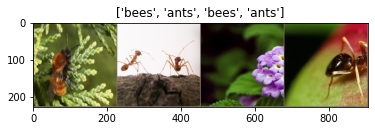

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6076 Acc: 0.6557
val Loss: 0.2914 Acc: 0.9020

Epoch 1/24
----------
train Loss: 0.4989 Acc: 0.7664
val Loss: 0.2349 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.4551 Acc: 0.8115
val Loss: 0.1938 Acc: 0.9542

Epoch 3/24
----------
train Loss: 0.4420 Acc: 0.7910
val Loss: 0.2505 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.3996 Acc: 0.8238
val Loss: 0.1934 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.3748 Acc: 0.8443
val Loss: 0.2657 Acc: 0.9020

Epoch 6/24
----------
train Loss: 0.3683 Acc: 0.8607
val Loss: 0.1847 Acc: 0.9542

Epoch 7/24
----------
train Loss: 0.3583 Acc: 0.8443
val Loss: 0.2074 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.3256 Acc: 0.8566
val Loss: 0.1789 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.4091 Acc: 0.8115
val Loss: 0.2023 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3621 Acc: 0.8197
val Loss: 0.1829 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.2660 Acc: 0.8975
val Loss: 0.1857 Acc: 0.9542

Ep

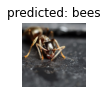

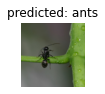

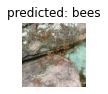

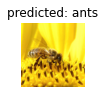

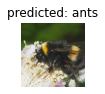

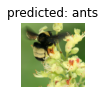

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## 10. Feature Extraction

In [ ]:
from PIL import Image
import numpy as np                                                   # https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18 
import torch
import torchvision.models as models
import torchvision.transforms as transforms

def get_resnet18_features(image_path):
    # Load the pre-trained ResNet18 model
    resnet18 = models.resnet18(pretrained=True)

    # Remove the last layer (the fully connected layer)
    resnet18 = torch.nn.Sequential(*(list(resnet18.children())[:-1]))

    # Set the model to evaluation mode
    resnet18.eval()

    # Load and preprocess the input image
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    image = transform(image)

    # Extract the features
    with torch.no_grad():
        features = resnet18(image.unsqueeze(0)).squeeze().numpy()

    return features


import numpy as np

# Get the training dataset
train_dataset = image_datasets['train']

# Initialize an empty array to store the ResNet18 features
resnet18_features = np.zeros((len(train_dataset), 512))

# Loop through the training dataset and extract the features
target=[]
for i in range(len(train_dataset)):
    image_path, _ = train_dataset.samples[i]
    resnet18_features[i, :] = get_resnet18_features(image_path)
    target.append(_)
# resnet18_features is an Nx512 dimensional numpy array containing the ResNet18 features for all the training images.
target = np.array(target)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(np.squeeze(resnet18_features).shape)
print(target.shape)

(244, 512)
(244,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000),
    'SVM': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Define the hyperparameters to search over for each model
hyperparams = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
    'Random Forest': {'max_depth': [10, 20, None], 'n_estimators': [100, 500, 1000]}
}

scoring = ['accuracy', 'f1', 'roc_auc']
# Perform grid search over the hyperparameters for each model
for i in scoring: 
    print(i + ':')
    for model_name, model in models.items():
        params = hyperparams[model_name]
        clf = GridSearchCV(model, params, cv=5,scoring = i)
        clf.fit( np.squeeze(resnet18_features), target)
        print(f'{model_name} best parameters: {clf.best_params_}')

 


accuracy:
Logistic Regression best parameters: {'C': 0.1}
SVM best parameters: {'C': 0.1, 'gamma': 0.1}
Random Forest best parameters: {'max_depth': 10, 'n_estimators': 1000}
f1:
Logistic Regression best parameters: {'C': 0.1}
SVM best parameters: {'C': 0.1, 'gamma': 0.1}
Random Forest best parameters: {'max_depth': 10, 'n_estimators': 500}
roc_auc:
Logistic Regression best parameters: {'C': 1}
SVM best parameters: {'C': 10, 'gamma': 0.1}
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 1000}


## 11. Predictions

In [ ]:
import numpy as np

# Get the training dataset
test_dataset = image_datasets['val']

# Initialize an empty array to store the ResNet18 features
resnet18_features_test = np.zeros((len(test_dataset), 512))

# Loop through the training dataset and extract the features
target_t=[]
for i in range(len(test_dataset)):
    image_path, _ = test_dataset.samples[i]
    resnet18_features_test[i, :] = get_resnet18_features(image_path)
    target_t.append(_)
# resnet18_features is an Nx512 dimensional numpy array containing the ResNet18 features for all the training images.
target_t = np.array(target_t)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
# Evaluate the model on the test data
model = LogisticRegression(C = 0.1, penalty='l2', solver='lbfgs', max_iter=1000)
lg = model.fit(np.squeeze(resnet18_features), target)
y_pred = lg.predict(np.squeeze(resnet18_features_test))
accuracy = accuracy_score(target_t, y_pred)
f1 = f1_score(target_t, y_pred, average='macro')
print(f'{model} accuracy: {accuracy:.4f}, F1 score: {f1:.4f}')

LogisticRegression(C=0.1, max_iter=1000) accuracy: 0.9608, F1 score: 0.9606


In [ ]:
# Evaluate the model on the test data
model = SVC(kernel='rbf')
rbf = model.fit(np.squeeze(resnet18_features), target)
y_pred = rbf.predict(np.squeeze(resnet18_features_test))
accuracy = accuracy_score(target_t, y_pred)
f1 = f1_score(target_t, y_pred, average='macro')
print(f'{model} accuracy: {accuracy:.4f}, F1 score: {f1:.4f}')

SVC() accuracy: 0.9542, F1 score: 0.9541


In [ ]:
# Evaluate the model on the test data
model = RandomForestClassifier(max_depth= 10, n_estimators= 1000)
rf = model.fit(np.squeeze(resnet18_features), target)
y_pred = rf.predict(np.squeeze(resnet18_features_test))
accuracy = accuracy_score(target_t, y_pred)
f1 = f1_score(target_t, y_pred, average='macro')
print(f'{model} accuracy: {accuracy:.4f}, F1 score: {f1:.4f}')

RandomForestClassifier(max_depth=10, n_estimators=1000) accuracy: 0.9542, F1 score: 0.9540


## 12. Refrences
    a. Most of the codes major sides i have given in there comment outs 
    b. towardsdatascience.com is major side for core understanding of concepts and relevant code
    c. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html for question 10,11
    d. chatgpt for some problems theory and some functions code
